In [2]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread, imshow
from skimage import data
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv, rgba2rgb
import pandas as pd

C:\Users\Jason\AppData\Roaming\Python\Python38\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


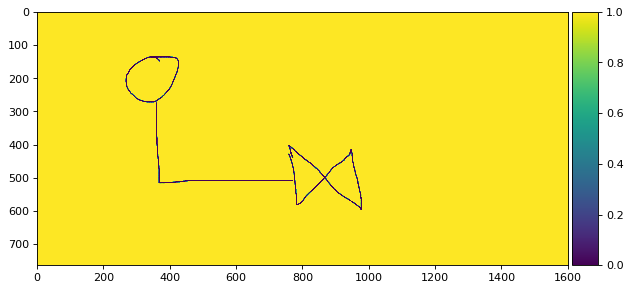

In [3]:
shawls = rgb2gray(rgba2rgb(imread('img.png')))
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(shawls)

C:\Users\Jason\AppData\Local\Temp\ipykernel_7436\2315913936.py:1: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  entropy_image = entropy(shawls, disk(1))
C:\Users\Jason\AppData\Roaming\Python\Python38\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


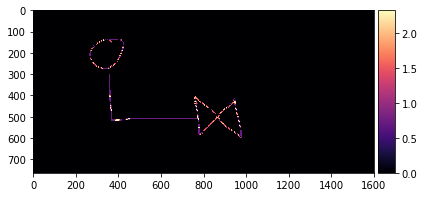

In [4]:
entropy_image = entropy(shawls, disk(1))
imshow(entropy_image, cmap = 'magma')

C:\Users\Jason\AppData\Local\Temp\ipykernel_7436\2490461756.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  arr=np.array(entropy_image>1.5,dtype=np.int)


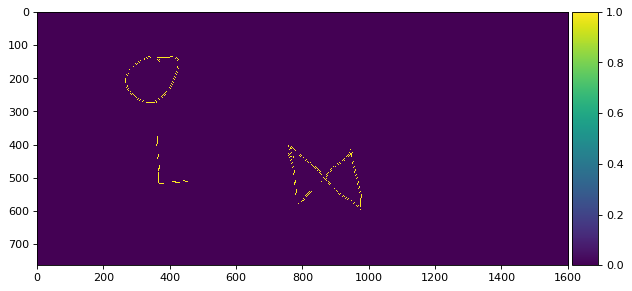

In [5]:
arr=np.array(entropy_image>1.5,dtype=np.int)
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(arr)

In [6]:
arr=np.transpose(np.nonzero(entropy_image>1.5))
df=pd.DataFrame(arr)
df.to_csv("data1.csv")

In [35]:
def threshold_checker(image):
    thresholds =  np.arange(0.1,1.1,0.1)
    # image_gray = rgb2gray(image)
    entropy_image = entropy(image, disk(1))
    scaled_entropy = entropy_image / entropy_image.max()  
    fig, ax = plt.subplots(2, 5, figsize=(17, 10))
    for n, ax in enumerate(ax.flatten()):
        ax.set_title(f'Threshold  : {round(thresholds[n],2)}', 
                     fontsize = 16)
        threshold = scaled_entropy > thresholds[n]
        ax.imshow(threshold, cmap = 'gist_stern_r')
        ax.axis('off')
    fig.tight_layout()

C:\Users\Jason\AppData\Local\Temp\ipykernel_3156\1344755586.py:4: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  entropy_image = entropy(image, disk(1))


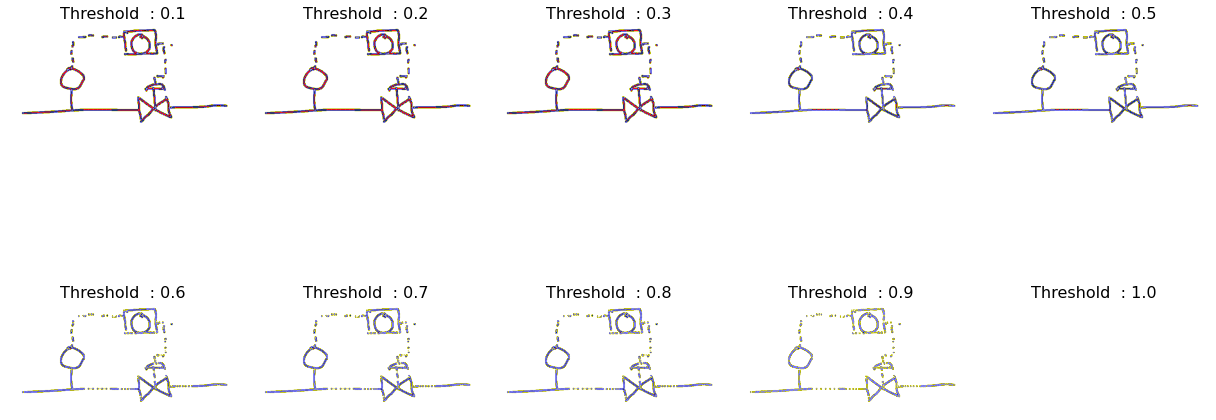

In [36]:
threshold_checker(shawls)